### Pima Indian Diabetes Dataset

Diabetes is a chronic medical condition that affects how the body processes glucose. The purpose of this project is to come up with an accurate model for the diagnostic prediction of diabetes in patients, based on certain diagnostic measurements. The dataset focuses on females aged 21 and older of Pima Indian heritage and will leverage machine learning techniques to make these predictions. The dataset used in this analysis is a health dataset containing information related to factors that may influence the likelihood of a person developing diabetes. This dataset consists of 768 observations with 8 independent variables and 1 dependent variable, which indicates whether a person has been diagnosed with diabetes or not.

### Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, auc, RocCurveDisplay
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
%matplotlib inline

Data Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Loading Dataset

In [23]:
# Loading the diabetes dataset
df = pd.read_csv('data/diabetes.csv')

In [24]:
# Printing the first 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Information

In [25]:
# Checking the shape of the dataframe
df.shape

(768, 9)

In [26]:
# Checking for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
# Checking the data info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Cleaning

In [28]:
# Displaying statistical details of the dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# Displaying the pairwise correlation of the dataframe columns
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [30]:
# Checking for invalid values in the dataset
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(len(df[df[i] == 0]), i)

5 Glucose
35 BloodPressure
227 SkinThickness
374 Insulin
11 BMI


In [31]:
# Usingg KNN to impute the missing values
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[i] = df[i].replace(0, np.nan)

imputer = KNNImputer()
# Fitting the imputer to the data
imputer.fit(df)
# Transforming the data
Xtrans = imputer.transform(df)

In [32]:
# Converting the transformed data to a dataframe
df = pd.DataFrame(Xtrans, columns=df.columns)

In [33]:
# Checking for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
# Modified statistical details of the dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploratory Data Analysis

<Axes: >

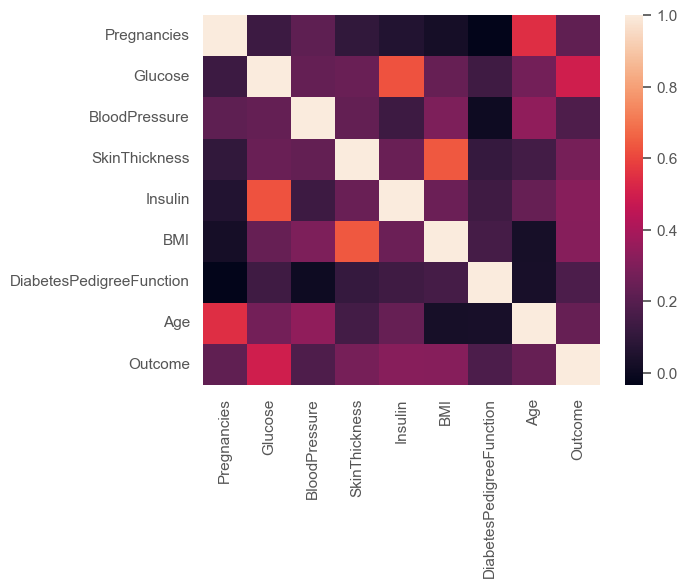

In [35]:
# Modified correlation of the dataframe columns
sns.heatmap(df.corr())

In [36]:
# Modified correlation of the dataframe columns
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131230,0.218327,0.102406,0.061377,0.023323,-0.033523,0.544341,0.221898
Glucose,0.131230,1.000000,0.233992,0.246807,0.628432,0.238457,0.139226,0.270115,0.495853
BloodPressure,0.218327,0.233992,1.000000,0.230225,0.134373,0.294618,0.006323,0.337930,0.176665
SkinThickness,0.102406,0.246807,0.230225,1.000000,0.245197,0.639370,0.113957,0.149474,0.279530
Insulin,0.061377,0.628432,0.134373,0.245197,1.000000,0.251185,0.139713,0.237708,0.320151
BMI,0.023323,0.238457,0.294618,0.639370,0.251185,1.000000,0.155259,0.029817,0.313882
DiabetesPedigreeFunction,-0.033523,0.139226,0.006323,0.113957,0.139713,0.155259,1.000000,0.033561,0.173844
Age,0.544341,0.270115,0.337930,0.149474,0.237708,0.029817,0.033561,1.000000,0.238356
Outcome,0.221898,0.495853,0.176665,0.279530,0.320151,0.313882,0.173844,0.238356,1.000000


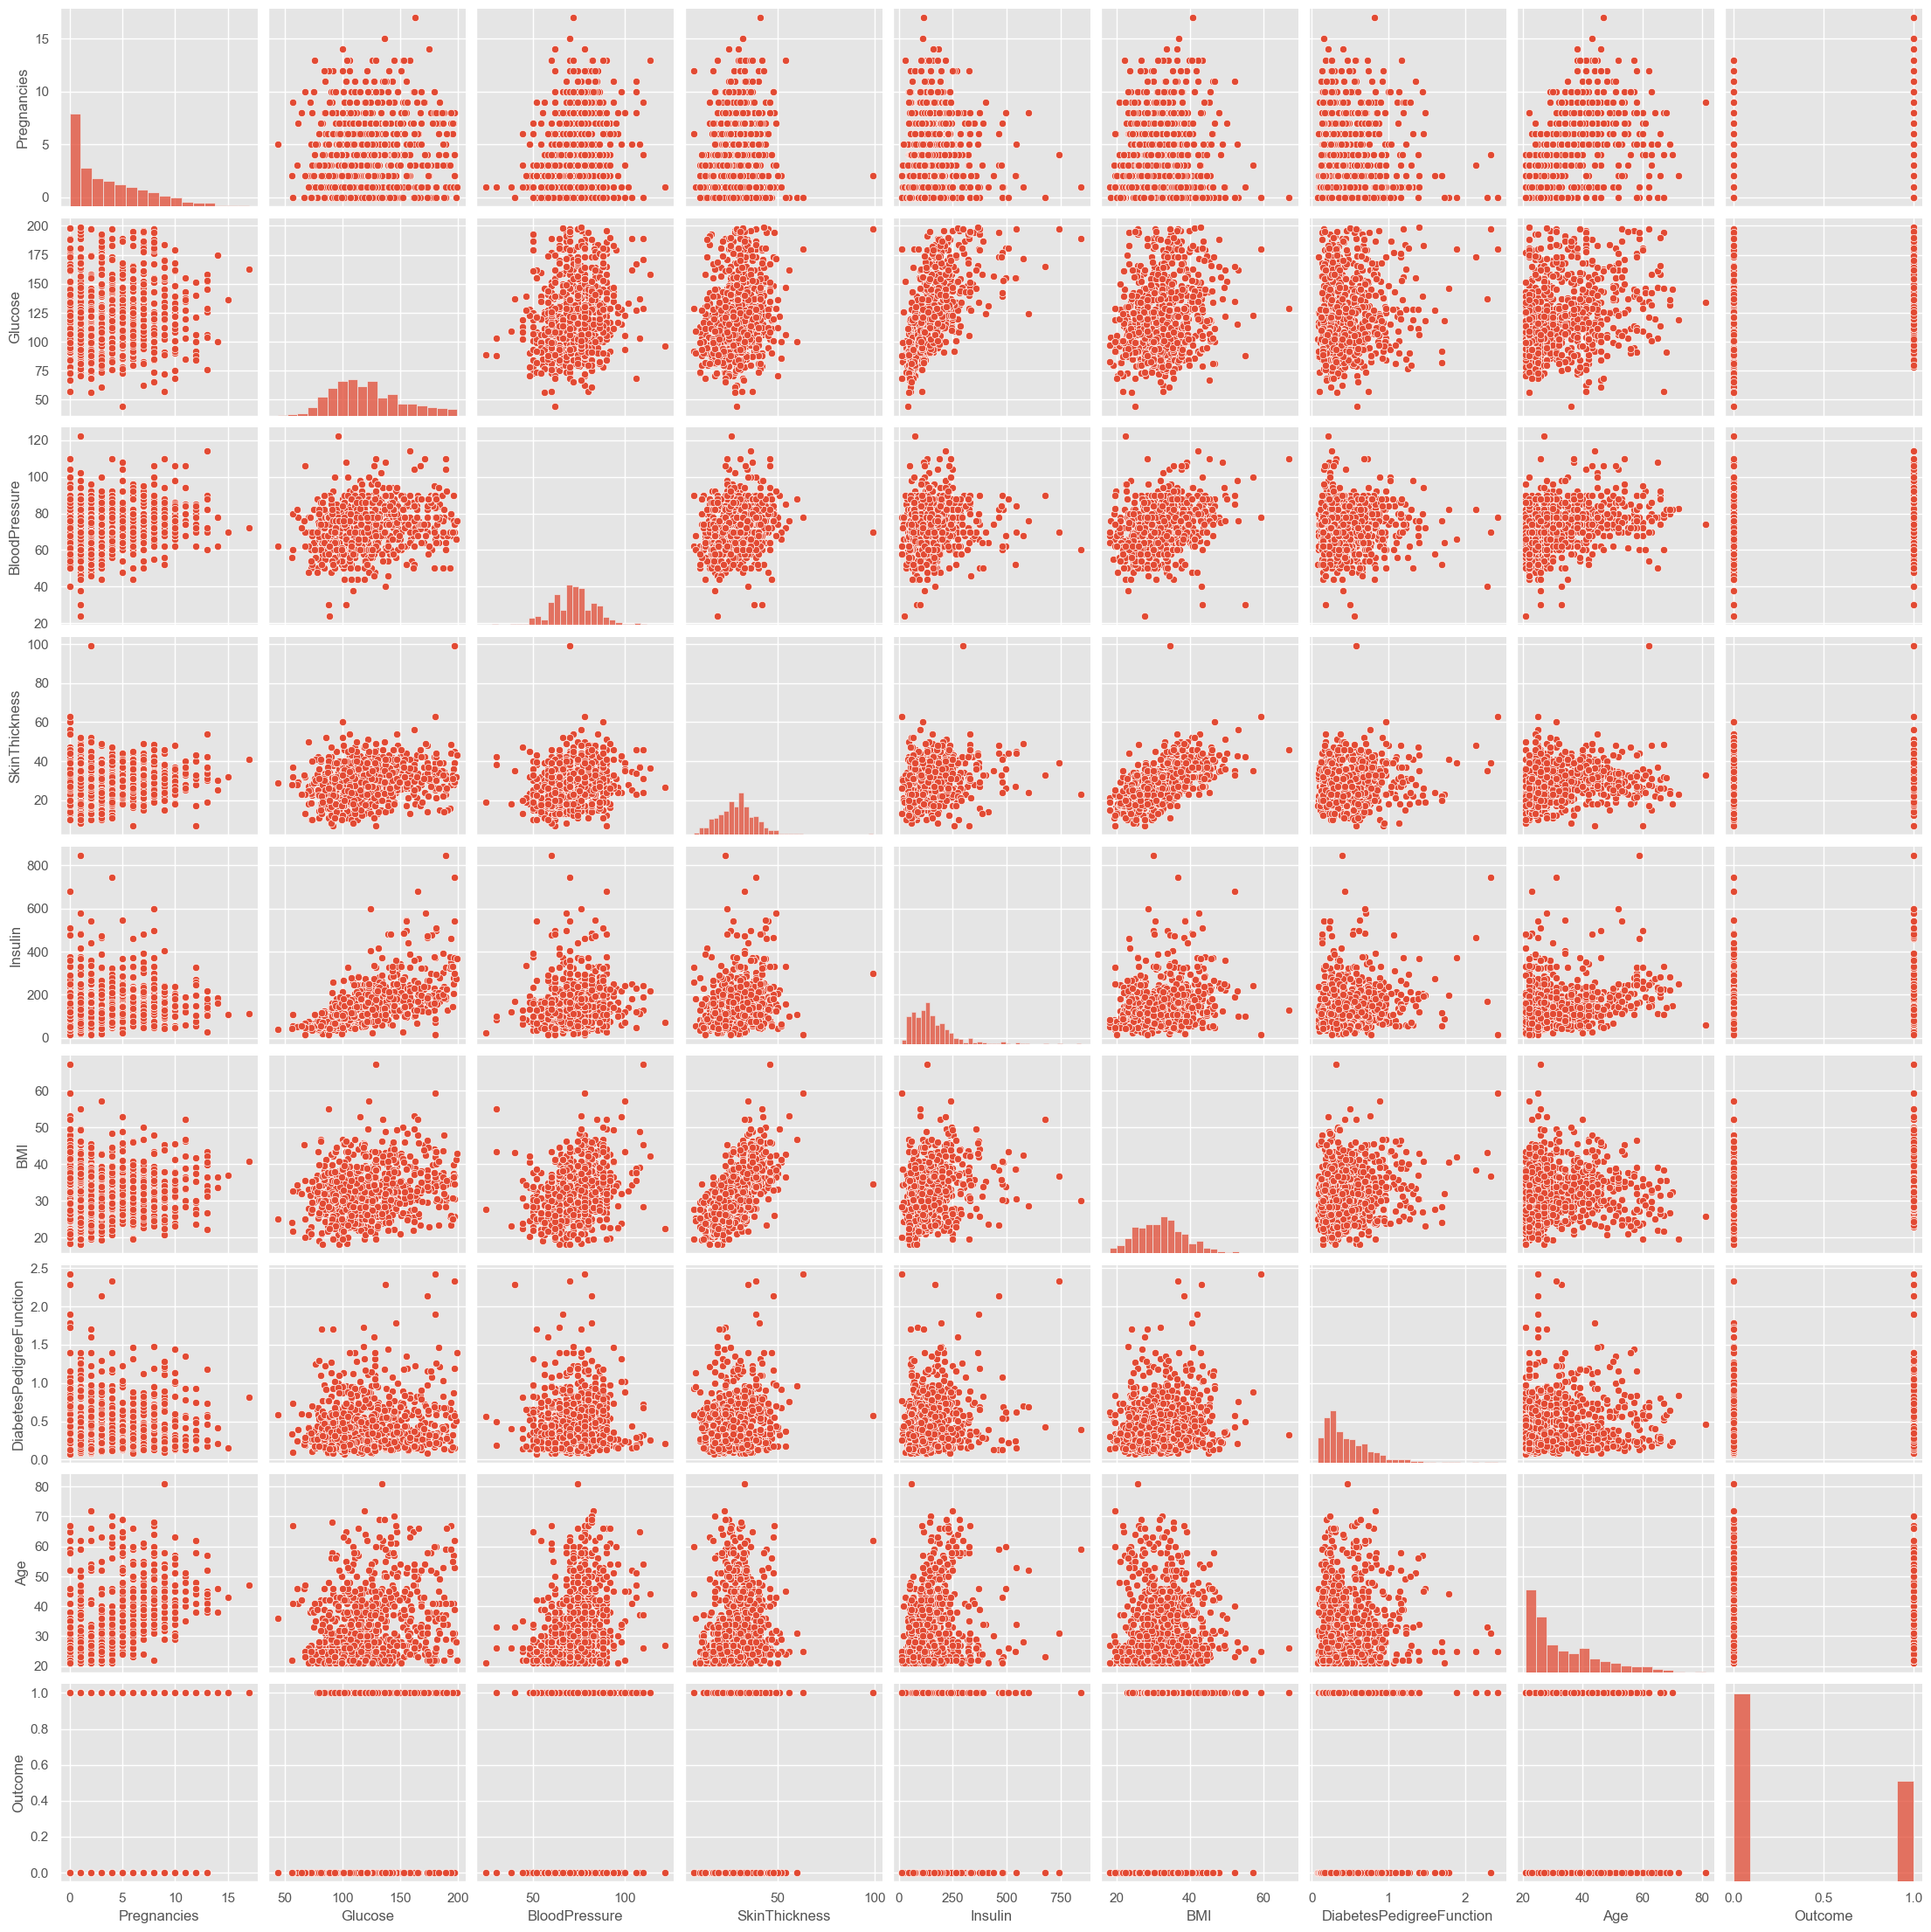

In [37]:
# Dispaying distribution and scaterplot
sns.pairplot(df)

### Oversampling

In [38]:
# Checking the distribution of the target variable
df.Outcome.value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

Oversampling is necessary as the dataset is unbalanced.

In [39]:
# Checking the distribution of the target variable  
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
osample = SMOTE()
X, y = osample.fit_resample(X, y)
y.value_counts()

Outcome
1.0    500
0.0    500
Name: count, dtype: int64

Dataset is now balanced

### Pre-Processing and Training Data Development

### Train-Validation-Test Split

In [40]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42, stratify = y_train)

In [41]:
X_train.shape, X_val.shape, X_test.shape

((720, 8), (80, 8), (200, 8))

### Feature Scaling

In [42]:
# Identifying categorical and numerical columns
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype in ["object"]]

# Standardizing the numerical columns to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Ordinal encoding for categorical columns
categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])

# Combining the numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Applying the preprocessor to the training, validation, and test sets
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Printing the shape of the transformed data
print('Training data shape:', X_train.shape)

Training data shape: (720, 8)


### Modeling

In [43]:
# Testing Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.775

In [44]:
# Testing Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.7625

In [45]:
# Testing SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.8

In [46]:
# Testing Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.825

In [47]:
# Using Cross Validation to evaluate the model
for i in [LogisticRegression(), DecisionTreeClassifier(), SVC(), RandomForestClassifier()]:
    scores = cross_val_score(i, X_train, y_train, cv=3)
    print(scores)
    print('Mean:', scores.mean())

[0.74583333 0.74583333 0.7375    ]
Mean: 0.7430555555555557
[0.74583333 0.75416667 0.70416667]
Mean: 0.7347222222222222
[0.79166667 0.7875     0.76666667]
Mean: 0.7819444444444444
[0.825      0.80833333 0.79166667]
Mean: 0.8083333333333332


In [48]:
# GRID SEARCH FOR HYPERPARAMETER TUNING

# Grid definition for model selection
classifiers = {
    'Logistic Regression': LogisticRegression(random_state = 0),
    'Decision Tree': DecisionTreeClassifier(random_state = 0),
    'SVC': SVC(random_state = 0),
    'Random Forest': RandomForestClassifier(random_state = 0),
    'LGBM': LGBMClassifier(random_state = 0, force_col_wise = True, verbose = -100)
}


LR_grid = {'penalty': ['l1', 'l2'],
              'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
              'max_iter': [50, 100, 150]}



SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']}



RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
                'max_depth': [4, 6, 8, 10, 12]}


tree_grid = {'max_depth': [4, 8, 12]}


boosted_grid = {'n_estimators': [50, 100, 150, 200],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [4, 8, 12]}

# Creating a dictionary of the classifiers and their respective grids
grid_dict = {
    'Logistic Regression': LR_grid,
    'Decision Tree': tree_grid,
    'SVC': SVC_grid,
    'Random Forest': RF_grid,
    'LGBM': boosted_grid
}

In [49]:
# GridSearchCV for each classifier

i = 0
clf_best_params = classifiers.copy()
validation_scores = pd.DataFrame({'Classifier':classifiers.keys(), 'Validation Accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid_dict[key], cv = None, n_jobs = -1)

    # Fitting the model to the training data
    clf.fit(X_train, y_train)
    validation_scores.iloc[i, 1] = clf.score(X_val, y_val)

    # Saving the best parameters of the classifier
    clf_best_params[key] = clf.best_params_
    
    # Printing iteration details
    stop = time.time()
    validation_scores.iloc[i, 2] = np.round((stop - start)/60, 2)

    print('Model:', key)
    print('Training time (mins):', validation_scores.iloc[i, 2])
    print(' ')
    i += 1

Model: Logistic Regression
Training time (mins): 0.1
 
Model: Decision Tree
Training time (mins): 0.0
 
Model: SVC
Training time (mins): 0.01
 
Model: Random Forest
Training time (mins): 0.18
 
Model: LGBM
Training time (mins): 0.4
 


In [50]:
validation_scores

,Classifier,Validation Accuracy,Training time
0,Logistic Regression,0.7750,0.10
1,Decision Tree,0.7750,0.00
2,SVC,0.8000,0.01
3,Random Forest,0.8125,0.18
4,LGBM,0.8000,0.40


### Model Selection

Proceeding with SVC